## ADS505 Final Project
## Dataset: Hotel Reservations
## Vivian Do, Mirna Philip, Halee Staggs


### Attribute Description

| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


### Library and Data Import

In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,  roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
!pip install imblearn
from imblearn.metrics import specificity_score, sensitivity_score


no display found. Using non-interactive Agg backend


In [2]:
#!pip install ipympl
import ipympl

In [3]:
#uploating the dataset
df = pd.read_csv('Hotel Reservations.csv')
# display of first three rows  in the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Understanding the dataset

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [6]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#The sum count of the duplicated values
df.duplicated().sum()

0

In [8]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Numerical Data Insights

In [9]:
#Data from children?
adult_zero = pd.DataFrame(df[df['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

Not_Canceled    95
Canceled        44
Name: booking_status, dtype: int64

In [10]:
#Check for rows that report no adults or children
both = pd.DataFrame(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: booking_status, dtype: int64)

In [11]:
#Check if any reservations report being not a week or weekend day
#Small amount of sample has no data for weekdays or weeknights
#Can maybe impute with median
no_day_type = pd.DataFrame(df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

Categorical Data Insights

In [12]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print('\n',df['booking_status'].value_counts()/len(df))

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

 Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


Arrival Year

In [13]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

Text(0.5, 1.0, 'Arrival Year by Booking Status')

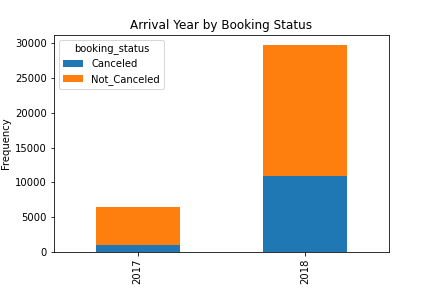

In [14]:
pd.crosstab(df['arrival_year'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Year by Booking Status')

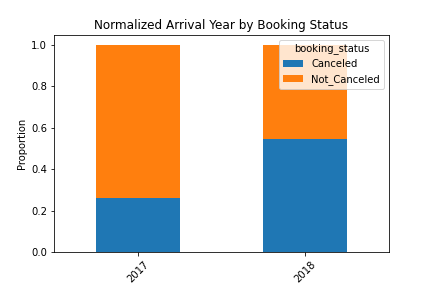

In [43]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['arrival_year'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Year by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Car Parking Space

In [15]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

Text(0.5, 1.0, 'Parking Space by Booking Status')

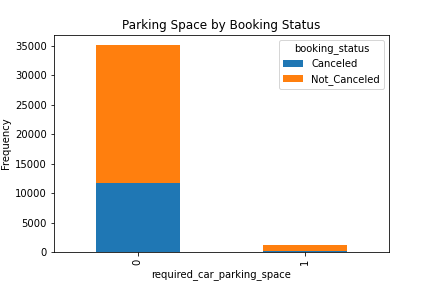

In [16]:
pd.crosstab(df['required_car_parking_space'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Parking Space by Booking Status')

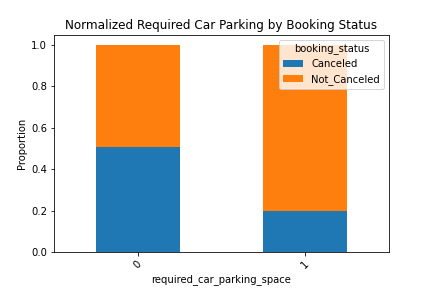

In [42]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['required_car_parking_space'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Required Car Parking by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Repeated Guest

In [17]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

Text(0.5, 1.0, 'Repeated Guest by Booking Status')

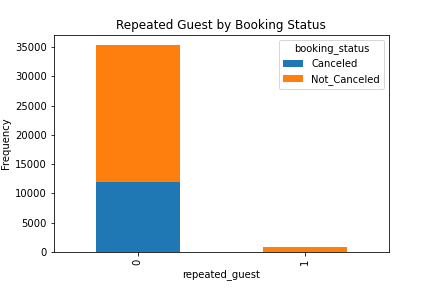

In [18]:
pd.crosstab(df['repeated_guest'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Repeated Guest by Booking Status')

/opt/miniconda3/envs/ADS500B/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


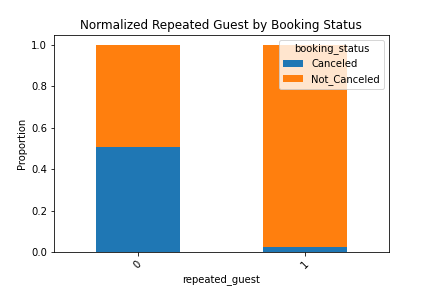

In [41]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['repeated_guest'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Repeated Guest by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Arrival Month

In [19]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

Text(0.5, 1.0, 'Arrival Month by Booking Status')

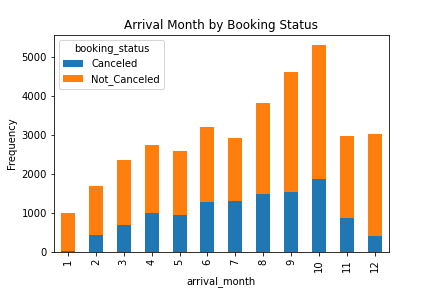

In [20]:
pd.crosstab(df['arrival_month'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Month by Booking Status')

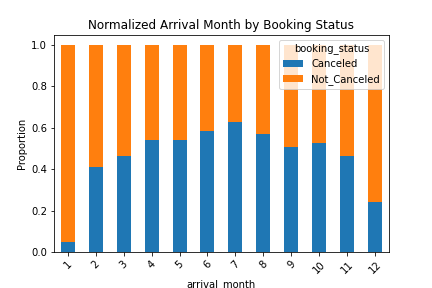

In [40]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['arrival_month'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Month by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Meal Plan

In [21]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Text(0.5, 1.0, 'Meal Plan by Booking Status')

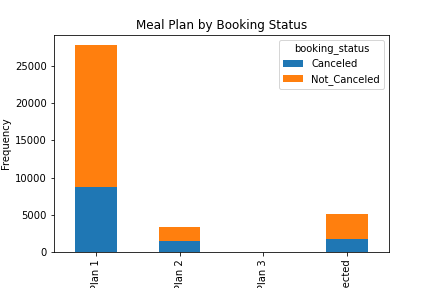

In [22]:
pd.crosstab(df['type_of_meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

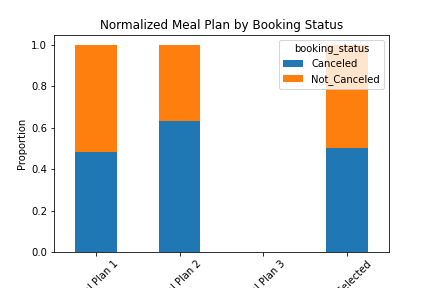

In [37]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['type_of_meal_plan'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Meal Plan by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Room Type

In [23]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Text(0.5, 1.0, 'Room Type by Booking Status')

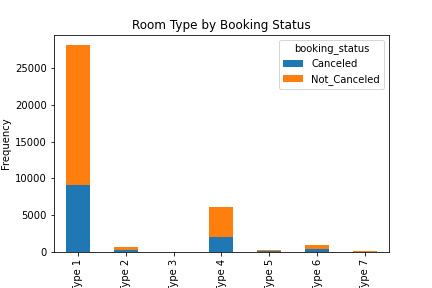

In [24]:
pd.crosstab(df['room_type_reserved'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

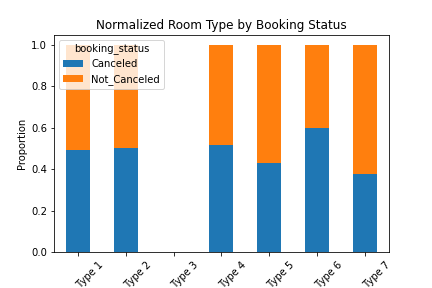

In [38]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['room_type_reserved'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Room Type by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

In [25]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Text(0.5, 1.0, 'Market Segment by Booking Status')

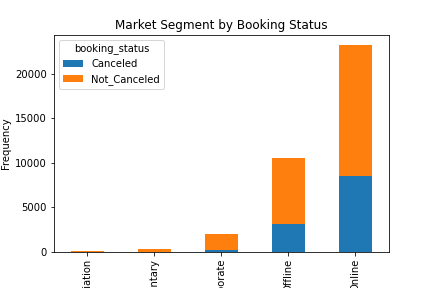

In [26]:
pd.crosstab(df['market_segment_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Market Segment by Booking Status')

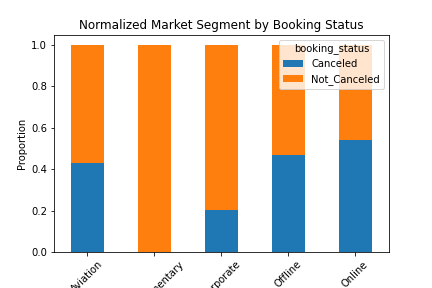

In [39]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['market_segment_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Market Segment by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

## Data Preparation

In [97]:
# Drop non-predictors
df=df.drop(['Booking_ID'],axis=1)

In [98]:
# Convert columns to correct datatypes 

# Categorical='object'/'category'
# Numerical='int'/'float'
df['type_of_meal_plan']=df['type_of_meal_plan'].astype('category')
df['required_car_parking_space']=df['required_car_parking_space'].astype('category')
df['room_type_reserved']=df['room_type_reserved'].astype('category')
df['arrival_year']=df['arrival_year'].astype('category')
df['arrival_month']=df['arrival_month'].astype('category')
df['market_segment_type']=df['market_segment_type'].astype('category')
df['repeated_guest']=df['repeated_guest'].astype('category')
df['booking_status']=df['booking_status'].astype('category')

# Show all categorical data
print('Categorical attributes \n',df.select_dtypes(include=['category']).columns)

# Show all numerical data
print('\n Numerical attributes \n',df.select_dtypes(include=['integer','float']).columns)

Categorical attributes 
 Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

 Numerical attributes 
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


### **Outlier**

### Feature Engineering

1. Calculate cancellation rate based on the number of previous cancellations out of all bookings

In [99]:
df['cancellation_rate']=df['no_of_previous_cancellations']/((df['no_of_previous_cancellations'])+(df['no_of_previous_bookings_not_canceled']))
df['cancellation_rate']=df['cancellation_rate'].astype('float64')
df['cancellation_rate'].value_counts()

0.000000    592
1.000000    118
0.166667     16
0.200000     15
0.333333     15
           ... 
0.089286      1
0.120000      1
0.075000      1
0.078947      1
0.190476      1
Name: cancellation_rate, Length: 81, dtype: int64

Can see that cancellation rate provides same information as outcome variable. Do not use rate.

In [100]:
y1 = list(df[df['booking_status'] == 'Canceled']['cancellation_rate'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['cancellation_rate'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Cancellation Rate')
plt.ylabel('Frequency')
plt.title('Cancellation Rate by Cancellation Status')
plt.legend(loc='upper right')

2. Get full arrival date by combining year, month, and day

In [101]:
# Combine year, month, day into 1 column in datetime format ('full_arrival_date')
df['day']=df['arrival_date'].copy()
df['month']=df['arrival_month'].copy()
df['year']=df['arrival_year'].copy()
df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')

3. Get total number of guests

In [102]:
df['total_guests']=df['no_of_adults']+df['no_of_children']

In [103]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_guests'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_guests'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.title('Total Guests by Cancellation Status')
plt.legend(loc='upper right')

4. Get total number of nights for each booking

In [104]:
df['total_nights']=df['no_of_weekend_nights']+df['no_of_week_nights']

In [105]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_nights'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_nights'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.title('Total Nights by Cancellation Status')
plt.legend(loc='upper right')

5. Get seasonality from arrival month

In [106]:
def map_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Unknown'  # Handle any unexpected values

# Apply mapping function to create a new 'season' column
df['season'] = df['arrival_month'].apply(map_to_season)
df['season']=df['season'].astype('category')
df['season'].value_counts()

Autumn    12908
Summer     9936
Spring     7692
Winter     5739
Name: season, dtype: int64

Text(0.5, 1.0, 'Season by Booking Status')

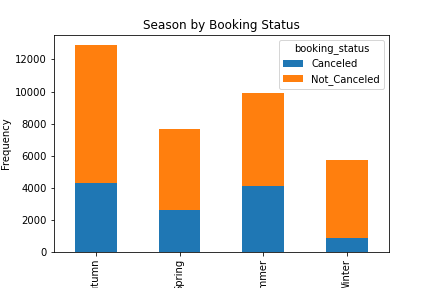

In [107]:
pd.crosstab(df['season'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Season by Booking Status')

6. Past Customer (0 - No, 1 - Yes)

In [108]:
#Update to binary variable: 0 - not past customer, 1 - past customer
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [109]:
df['past_customer'] = df['no_of_previous_bookings_not_canceled'].apply(lambda x: 1 if x > 0 else 0)
df['past_customer']=df['past_customer'].astype('category')

Text(0.5, 1.0, 'Past Customer by Booking Status')

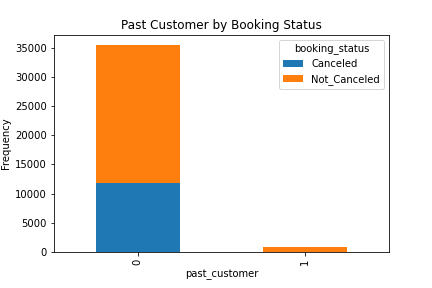

In [110]:
pd.crosstab(df['past_customer'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Past Customer by Booking Status')

7. Past Cancellation (0- No, 1-Yes)

In [111]:
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
df['no_of_previous_cancellations'].value_counts()


0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [112]:
df['past_cancellation'] = df['no_of_previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)
df['past_cancellation']=df['past_cancellation'].astype('category')

Text(0.5, 1.0, 'Past Cancellation by Booking Status')

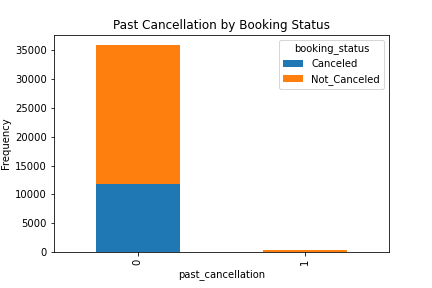

In [113]:
pd.crosstab(df['past_cancellation'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Past Cancellation by Booking Status')

Most guests did not have a previous cancellation. We will convert this numerical variable to a binary variable where:

    * 0 = guest did not have a previous cancellation
    * 1 = guest did have a previous cancellation

8. Total Reservation Price

In [114]:
df['total_price'] = pd.array(df['total_nights'])*pd.array(df['avg_price_per_room'])

In [115]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_price'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_price'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Price (euros)')
plt.ylabel('Frequency')
plt.title('Reservation Price by Cancellation Status')
plt.legend(loc='upper right')

9. Meal plan as binary

In [116]:
df['meal_plan'] = df['type_of_meal_plan'].apply(lambda x: 0 if x == 'Not Selected' else 1)
df['meal_plan']=df['meal_plan'].astype('category')

Text(0.5, 1.0, 'Meal Plan by Booking Status')

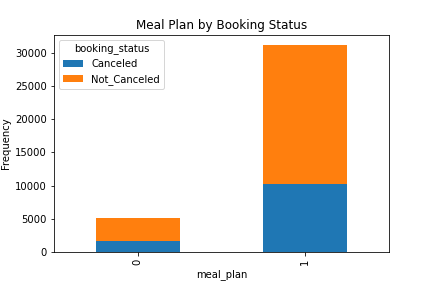

In [117]:
pd.crosstab(df['meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

10. Room type as binary

In [118]:
df['room_type'] = df['room_type_reserved'].apply(lambda x: 1 if x == 'Room_Type 1' else 0)
df['room_type']=df['room_type'].astype('category')

Text(0.5, 1.0, 'Room Type by Booking Status')

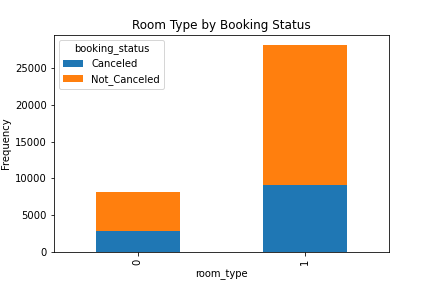

In [119]:
pd.crosstab(df['room_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

11. Market Segment As Three Level Variable

In [120]:
seg_df = df['market_segment_type'].value_counts().to_frame()
#Create bins based on frequency of each vehicle type and label based on popularity
seg_df['seg_bin'] = pd.cut(seg_df['market_segment_type'], bins = [0,2018,10529,23215], labels = ['Other','Offline','Online'])
#Add vehicle type ID as a variable
seg_df['index'] = seg_df.index
seg_dict = {pd.array(seg_df['index'])[i]: pd.array(seg_df['seg_bin'])[i] for i in range(len(pd.array(seg_df['index'])))}
df['segment'] = df['market_segment_type'].map(seg_dict)

In [121]:
df['segment'] = df['segment'].astype('category')
df['segment'].value_counts()

Online     23214
Offline    10528
Other       2533
Name: segment, dtype: int64

Text(0.5, 1.0, 'Market Segment by Cancellation Status')

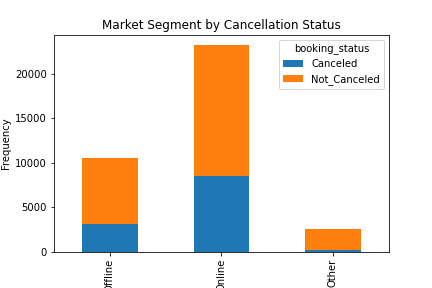

In [122]:
pd.crosstab(df['segment'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Market Segment by Cancellation Status')

In [123]:
# Show all columns, including all added columns
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'cancellation_rate', 'day', 'month', 'year', 'full_arrival_date',
       'total_guests', 'total_nights', 'season', 'past_customer',
       'past_cancellation', 'total_price', 'meal_plan', 'room_type',
       'segment'],
      dtype='object')

## Exploratory Data Analysis

In [124]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'cancellation_rate', 'day', 'total_guests', 'total_nights', 'total_price']


In [125]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'booking_status', 'month', 'year', 'season', 'past_customer', 'past_cancellation', 'meal_plan', 'room_type', 'segment']


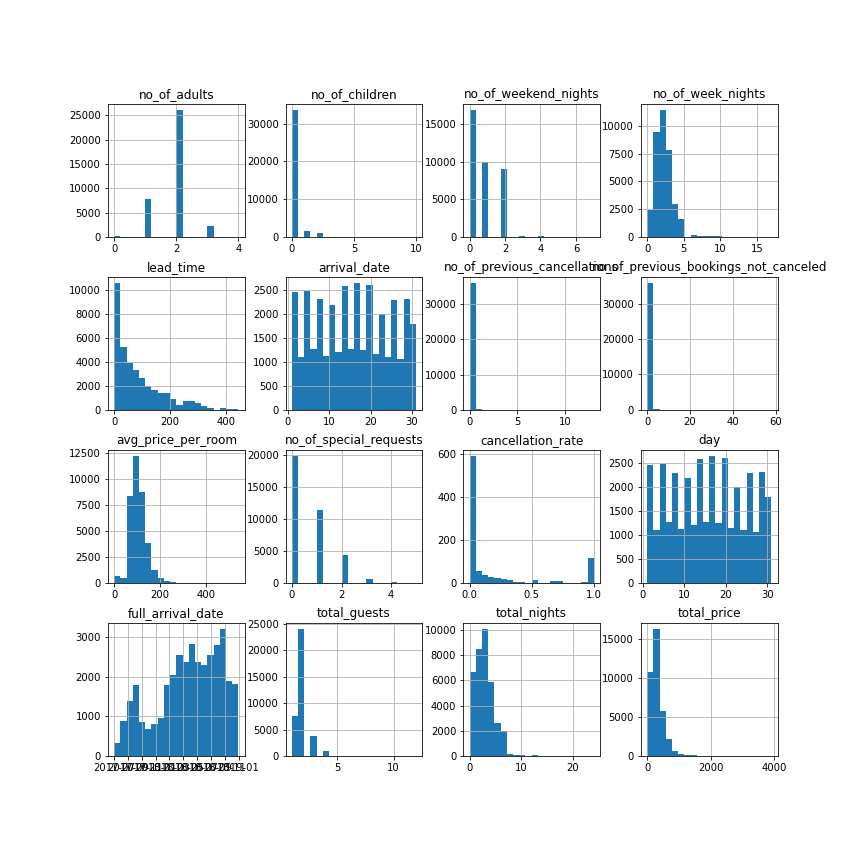

In [126]:
#Distributions for numerical variables
df.hist(figsize=(12,12),bins=20)
plt.show()

<AxesSubplot:title={'center':'Heat Map of Correlation Coefficients'}>

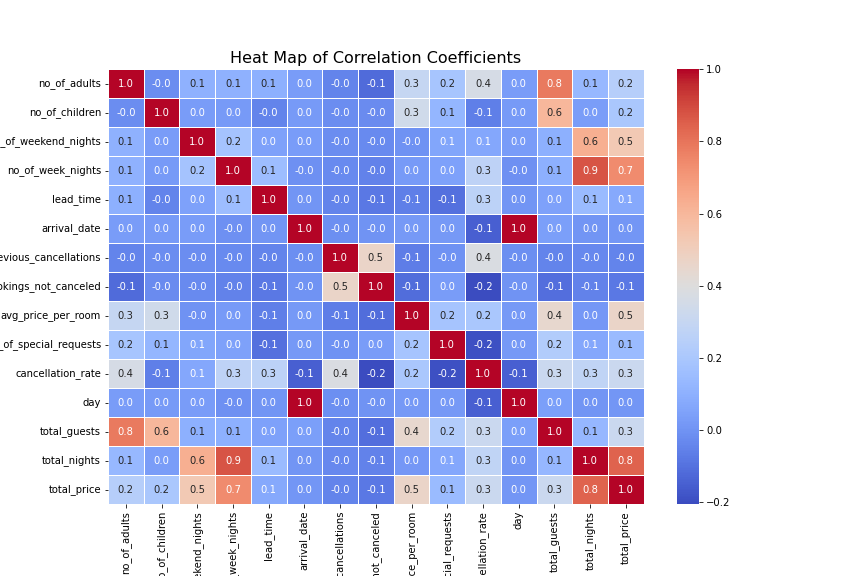

In [127]:
#Correlations between numerical variables
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

In [128]:
#All numerical values have low to no correlation with each other
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,cancellation_rate,day,total_guests,total_nights,total_price
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.097287,0.026338,-0.047426,-0.119166,0.296886,0.189401,0.363589,0.026338,0.785371,0.133803,0.241718
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.047091,0.025482,-0.016390,-0.021189,0.337728,0.124486,-0.060046,0.025482,0.603365,0.033644,0.198209
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,0.046595,0.027304,-0.020690,-0.026312,-0.004525,0.060593,0.067632,0.027304,0.100658,0.629339,0.525327
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,0.149650,-0.009305,-0.030080,-0.049344,0.022753,0.045994,0.266809,-0.009305,0.099352,0.877513,0.739939
lead_time,0.097287,-0.047091,0.046595,0.149650,1.000000,0.006479,-0.045723,-0.078137,-0.062596,-0.101645,0.261401,0.006479,0.048441,0.140934,0.076493
arrival_date,0.026338,0.025482,0.027304,-0.009305,0.006479,1.000000,-0.012542,-0.001498,0.017898,0.018352,-0.149283,1.000000,0.036785,0.005960,0.008446
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,-0.045723,-0.012542,1.000000,0.468147,-0.063340,-0.003317,0.379768,-0.012542,-0.047975,-0.033849,-0.048069
no_of_previous_bookings_not_canceled,-0.119166,-0.021189,-0.026312,-0.049344,-0.078137,-0.001498,0.468147,1.000000,-0.113684,0.027377,-0.204408,-0.001498,-0.108168,-0.051807,-0.077407
avg_price_per_room,0.296886,0.337728,-0.004525,0.022753,-0.062596,0.017898,-0.063340,-0.113684,1.000000,0.184381,0.200016,0.017898,0.445906,0.015768,0.467291
no_of_special_requests,0.189401,0.124486,0.060593,0.045994,-0.101645,0.018352,-0.003317,0.027377,0.184381,1.000000,-0.192821,0.018352,0.228146,0.065871,0.142985


In [129]:
# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children',
                   'no_of_weekend_nights', 'no_of_week_nights',
                   'required_car_parking_space', 'lead_time', 'arrival_year',
                   'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests',
                  'cancellation_rate', 'total_price']

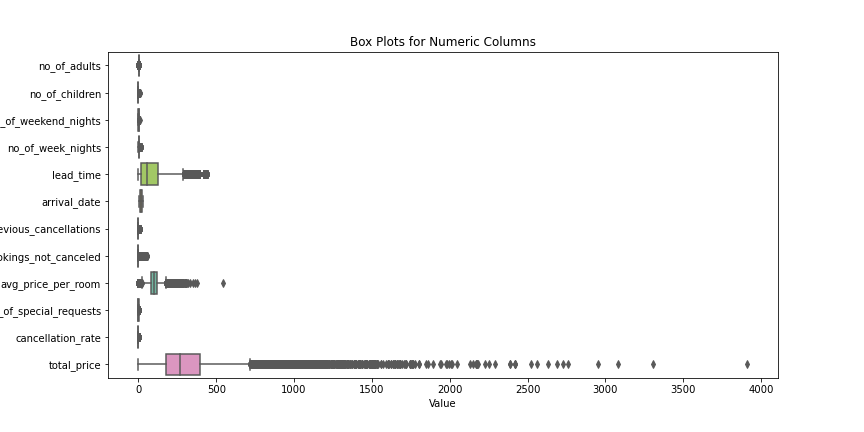

In [130]:
# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


In [131]:
df_cat = df[categorical_columns]
# Create cross-tab for categorical variables
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


booking_status              Canceled  Not_Canceled
required_car_parking_space                        
0                              11771         23380
1                                114          1010


booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


booking_status  Canceled  Not_Canceled
arrival_year                          
2017                 961          5553
2018               10924         1

Checking for outlier

In [132]:
#some Histograms for the numerical clumns
for col in numeric_cols(removeOutliers):
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(removeOutliers[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

NameError: name 'removeOutliers' is not defined

In [ ]:
categorical_columns= removeOutliers[[ 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]
categorical_columns

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


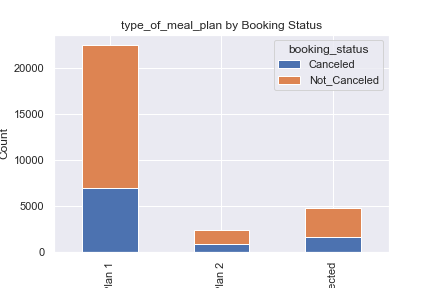

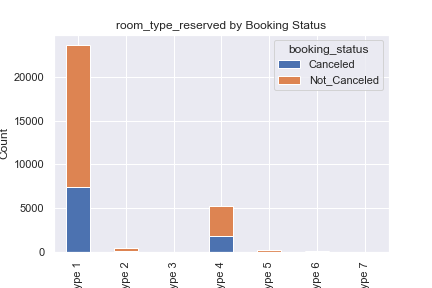

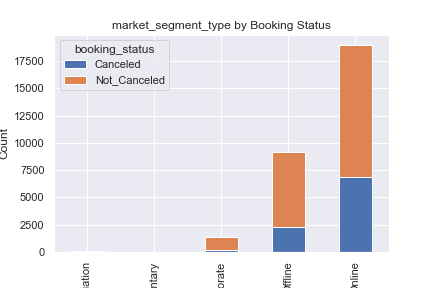

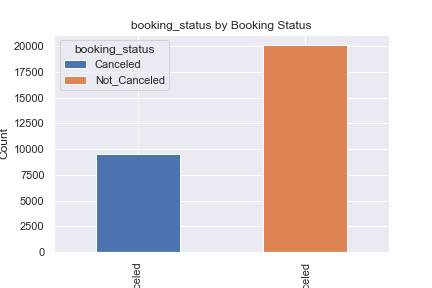

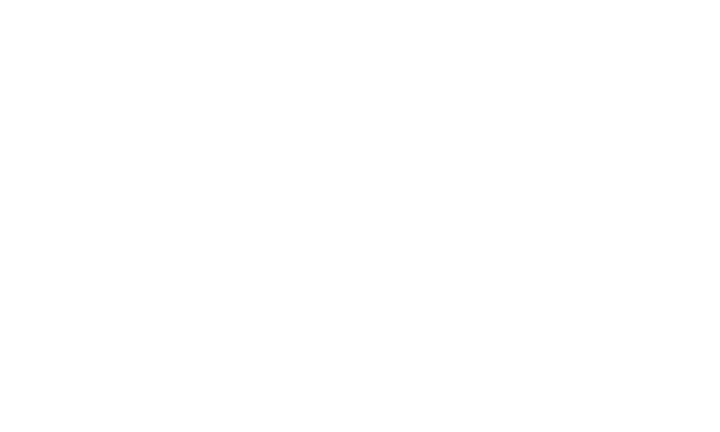

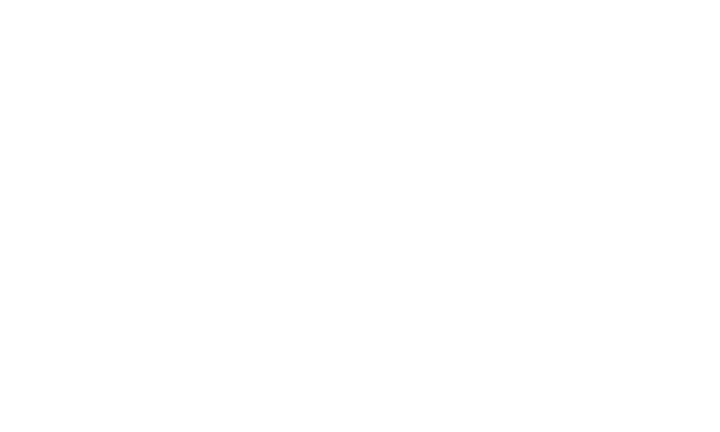

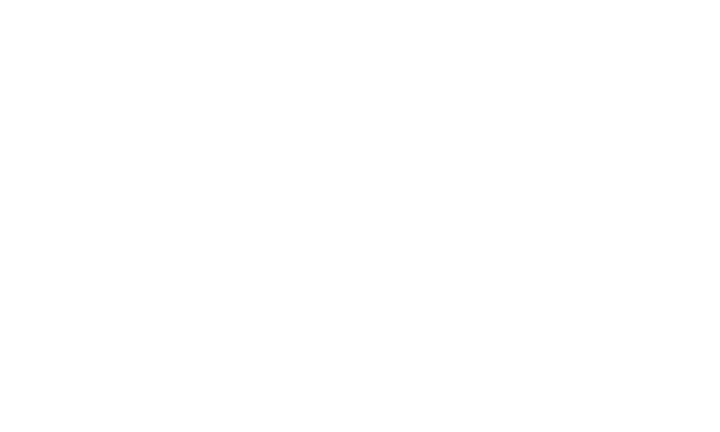

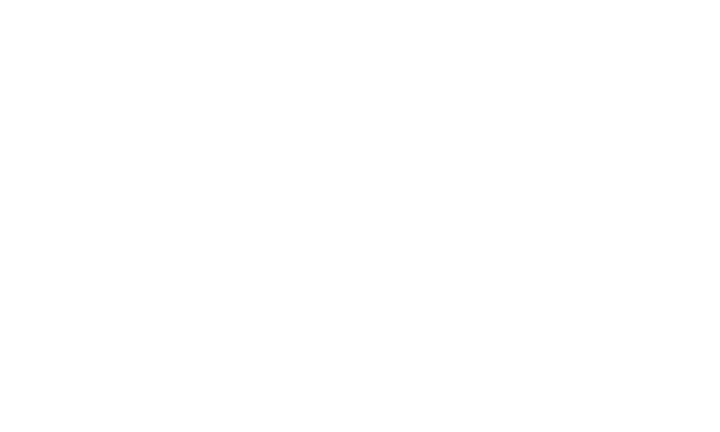

In [ ]:
# Create stacked bar charts
for col in categorical_columns:
  plt.figure(figsize=(10, 6))

  # plot
  cross_tab = pd.crosstab(index=removeOutliers[col], columns=removeOutliers['booking_status'])
  cross_tab.plot(kind='bar', stacked=True)
  plt.title(f"{col} by Booking Status")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

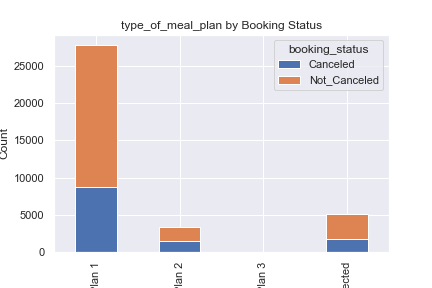

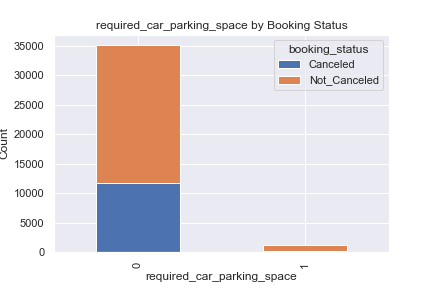

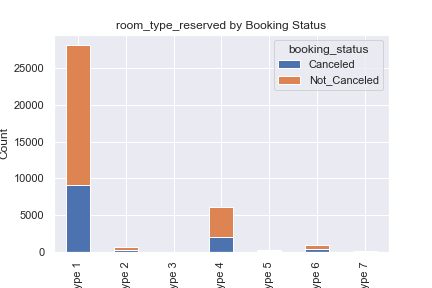

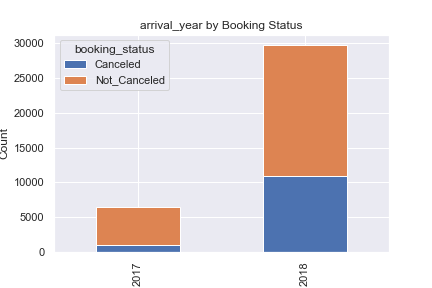

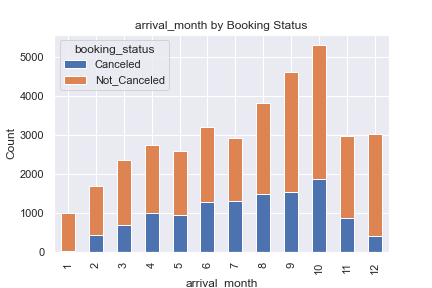

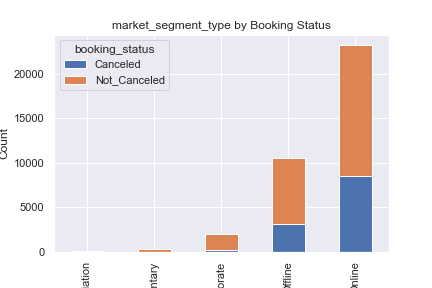

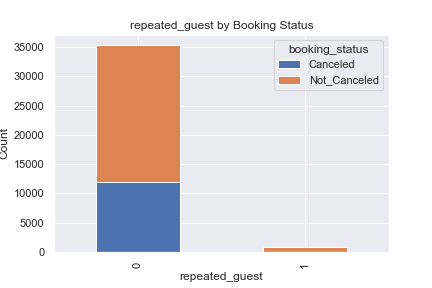

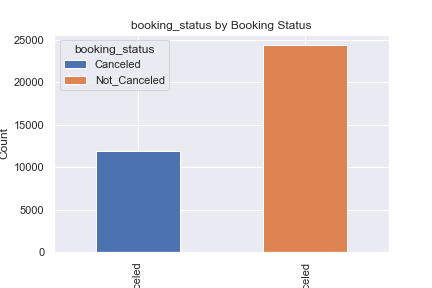

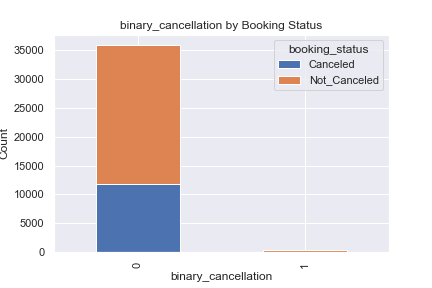

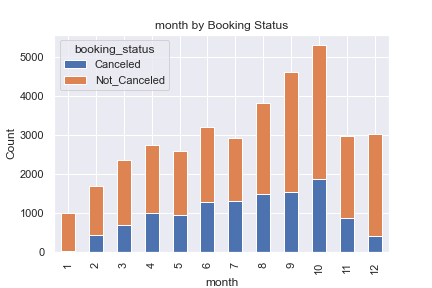

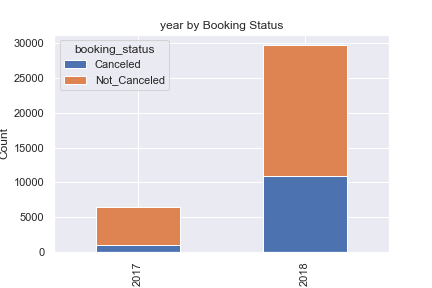

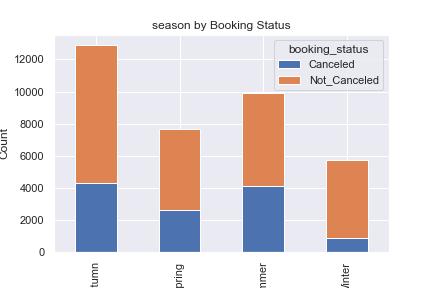

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [ ]:
# Stacked bar charts
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{column} by Booking Status")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# All reservations time-series (takes ~25 sec to run)
# sns.lineplot(data=df, x='full_arrival_date', y='booking_status_binary')
#plt.plot(df['full_arrival_date'])
#plt.xticks(rotation=45)
#plt.title('All Reservations')
#plt.show()

## **Data Split and Preprocessing Pipeline**

In [ ]:
cats = ['segment', 'season']
bis = ['required_car_parking_space', 'meal_plan', 'room_type', 'repeated_guest', 'past_cancellation']
nums = ['lead_time', 'total_price', 'no_of_special_requests', 'total_guests']
all_vars = cats+bis+nums

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,binary_cancellation,cancellation_rate,day,month,year,full_arrival_date,total_guests,total_nights,season,booking_status_binary
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0,NaN,2,10,2017,2017-10-02,2,3,Autumn,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,0,NaN,6,11,2018,2018-11-06,2,5,Autumn,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0,NaN,28,2,2018,2018-02-28,1,3,Winter,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,0,NaN,20,5,2018,2018-05-20,2,2,Spring,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,0,NaN,11,4,2018,2018-04-11,2,2,Spring,0


In [ ]:
# New outcome variable
#df['booking_status_binary']=pd.get_dummies(df['booking_status'],drop_first=True)
#df.booking_status_binary

In [ ]:
df['book_binary'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [ ]:
df['book_binary'].value_counts()

0    24390
1    11885
Name: book_binary, dtype: int64

In [ ]:
cat_pipe = Pipeline([('encoder', OneHotEncoder())])
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats),('num', num_pipe, nums)]))
all_pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['segment', 'season']),
                                                 ('num',
                                                  Pipeline(steps=[('variance',
                                                                   VarianceThreshold()),
                                                                  ('skew_standardize',
                                                                   PowerTransformer())]),
                                                  ['lead_time', 'total_price',
                                                   'no_of_special_requests',
                                                   'total_guests'])]))])

## Creating a balanced training dataset

In [ ]:
#Resplit data
X = df[all_vars]
y = df['book_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [ ]:
#Separate cancels and non-cancels
cancel = y_train[y_train == 1]
no_cancel = y_train[y_train == 0]

In [ ]:
#Take random sample of 4929 non-cancellations
no_cancel_samp = no_cancel.sample(n = len(cancel), random_state = 1)

In [ ]:
#Combine 4929 cancellations with sample of 4929 non-cancellations
balance_samp = pd.concat([cancel, no_cancel_samp])

In [ ]:
#Verify balance of new training set
balance_samp.value_counts()

1    4929
0    4929
Name: book_binary, dtype: int64

In [ ]:
#Merge new list of indices with the rest of features
balance_df = pd.merge(X_train, balance_samp[balance_samp.index.isin(X_train.index)],left_index=True, right_index=True)

In [ ]:
#Create new input and output vectors for training data
X_train_bal = pd.DataFrame(balance_df.loc[:, balance_df.columns != 'book_binary'])
y_train_bal = balance_df[['book_binary']]

In [ ]:
#Apply transformation pipeline to balanced training data
tr_nums_bal = pd.DataFrame(all_pipe.fit_transform(X_train_bal))
tr_bis_bal = X_train_bal[bis]
X_train_bal = pd.DataFrame({
    'Seg1': pd.array(tr_nums_bal[0]),
    'Seg2': pd.array(tr_nums_bal[1]),
    'Seg3': pd.array(tr_nums_bal[2]),
    'Season1': pd.array(tr_nums_bal[3]),
    'Season2': pd.array(tr_nums_bal[4]),
    'Season3': pd.array(tr_nums_bal[5]),
    'Season4': pd.array(tr_nums_bal[6]),
    'LeadTime' : pd.array(tr_nums_bal[7]),
    'TotalPrice' : pd.array(tr_nums_bal[8]),
    'Requests' : pd.array(tr_nums_bal[9]),
    'Guests' : pd.array(tr_nums_bal[10]),
    'Park' : pd.array(tr_bis_bal['required_car_parking_space']),
    'Meal' : pd.array(tr_bis_bal['meal_plan']),
    'Room' : pd.array(tr_bis_bal['room_type']),
    'RepeatGuest' : pd.array(tr_bis_bal['repeated_guest']),
    'PastCancel' : pd.array(tr_bis_bal['past_cancellation'])
})

In [ ]:
X_train_bal['Park'] = X_train_bal['Park'].astype('int64')
X_train_bal['Meal'] = X_train_bal['Meal'].astype('int64')
X_train_bal['Room'] = X_train_bal['Room'].astype('int64')
X_train_bal['RepeatGuest'] = X_train_bal['RepeatGuest'].astype('int64')
X_train_bal['PastCancel'] = X_train_bal['PastCancel'].astype('int64')

In [ ]:
X_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Seg1         9858 non-null   float64
 1   Seg2         9858 non-null   float64
 2   Seg3         9858 non-null   float64
 3   Season1      9858 non-null   float64
 4   Season2      9858 non-null   float64
 5   Season3      9858 non-null   float64
 6   Season4      9858 non-null   float64
 7   LeadTime     9858 non-null   float64
 8   TotalPrice   9858 non-null   float64
 9   Requests     9858 non-null   float64
 10  Guests       9858 non-null   float64
 11  Park         9858 non-null   int64  
 12  Meal         9858 non-null   int64  
 13  Room         9858 non-null   int64  
 14  RepeatGuest  9858 non-null   int64  
 15  PastCancel   9858 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 1.2 MB


#### Dataset for logistic regression with one dummy variable removed for categories: Need C-1 dummies for linear models

In [ ]:
X_train_log_bal = X_train_bal.drop(['Seg1','Season1'], axis = 1)

## Unbalanced data split for validation and testing

In [ ]:
X = df[all_vars]
y = df['book_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((15000, 11), (12000, 11), (9275, 11))

In [ ]:
tr_bis = X_train[bis]
val_bis = X_val[bis]
test_bis = X_test[bis]

In [ ]:
X_train = pd.DataFrame(all_pipe.fit_transform(X_train))
X_val = pd.DataFrame(all_pipe.fit_transform(X_val))
X_test = pd.DataFrame(all_pipe.fit_transform(X_test))
X_train.shape, X_val.shape, X_test.shape

((15000, 11), (12000, 11), (9275, 11))

In [ ]:
X_train = pd.DataFrame({
    'Seg1': pd.array(X_train[0]),
    'Seg2': pd.array(X_train[1]),
    'Seg3': pd.array(X_train[2]),
    'Season1': pd.array(X_train[3]),
    'Season2': pd.array(X_train[4]),
    'Season3': pd.array(X_train[5]),
    'Season4': pd.array(X_train[6]),
    'LeadTime' : pd.array(X_train[7]),
    'TotalPrice' : pd.array(X_train[8]),
    'Requests' : pd.array(X_train[9]),
    'Guests' : pd.array(X_train[10]),
    'Park' : pd.array(tr_bis['required_car_parking_space']),
    'Meal' : pd.array(tr_bis['meal_plan']),
    'Room' : pd.array(tr_bis['room_type']),
    'RepeatGuest' : pd.array(tr_bis['repeated_guest']),
    'PastCancel' : pd.array(tr_bis['past_cancellation'])
})

In [ ]:
X_val = pd.DataFrame({
    'Seg1': pd.array(X_val[0]),
    'Seg2': pd.array(X_val[1]),
    'Seg3': pd.array(X_val[2]),
    'Season1': pd.array(X_val[3]),
    'Season2': pd.array(X_val[4]),
    'Season3': pd.array(X_val[5]),
    'Season4': pd.array(X_val[6]),
    'LeadTime' : pd.array(X_val[7]),
    'TotalPrice' : pd.array(X_val[8]),
    'Requests' : pd.array(X_val[9]),
    'Guests' : pd.array(X_val[10]),
    'Park' : pd.array(val_bis['required_car_parking_space']),
    'Meal' : pd.array(val_bis['meal_plan']),
    'Room' : pd.array(val_bis['room_type']),
    'RepeatGuest' : pd.array(val_bis['repeated_guest']),
    'PastCancel' : pd.array(val_bis['past_cancellation'])
})

In [ ]:
X_val['Park'] = X_val['Park'].astype('int64')
X_val['Meal'] = X_val['Meal'].astype('int64')
X_val['Room'] = X_val['Room'].astype('int64')
X_val['RepeatGuest'] = X_val['RepeatGuest'].astype('int64')
X_val['PastCancel'] = X_val['PastCancel'].astype('int64')

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Seg1         12000 non-null  float64
 1   Seg2         12000 non-null  float64
 2   Seg3         12000 non-null  float64
 3   Season1      12000 non-null  float64
 4   Season2      12000 non-null  float64
 5   Season3      12000 non-null  float64
 6   Season4      12000 non-null  float64
 7   LeadTime     12000 non-null  float64
 8   TotalPrice   12000 non-null  float64
 9   Requests     12000 non-null  float64
 10  Guests       12000 non-null  float64
 11  Park         12000 non-null  int64  
 12  Meal         12000 non-null  int64  
 13  Room         12000 non-null  int64  
 14  RepeatGuest  12000 non-null  int64  
 15  PastCancel   12000 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 1.5 MB


In [ ]:
X_test = pd.DataFrame({
    'Seg1': pd.array(X_test[0]),
    'Seg2': pd.array(X_test[1]),
    'Seg3': pd.array(X_test[2]),
    'Season1': pd.array(X_test[3]),
    'Season2': pd.array(X_test[4]),
    'Season3': pd.array(X_test[5]),
    'Season4': pd.array(X_test[6]),
    'LeadTime' : pd.array(X_test[7]),
    'TotalPrice' : pd.array(X_test[8]),
    'Requests' : pd.array(X_test[9]),
    'Guests' : pd.array(X_test[10]),
    'Park' : pd.array(test_bis['required_car_parking_space']),
    'Meal' : pd.array(test_bis['meal_plan']),
    'Room' : pd.array(test_bis['room_type']),
    'RepeatGuest' : pd.array(test_bis['repeated_guest']),
    'PastCancel' : pd.array(test_bis['past_cancellation'])
})

In [ ]:
X_test['Park'] = X_test['Park'].astype('int64')
X_test['Meal'] = X_test['Meal'].astype('int64')
X_test['Room'] = X_test['Room'].astype('int64')
X_test['RepeatGuest'] = X_test['RepeatGuest'].astype('int64')
X_test['PastCancel'] = X_test['PastCancel'].astype('int64')

### Predictors for logistic regression with one of the dummies removed: need C-1 dummies for linear models

In [ ]:
X_train_log = X_train.drop(['Seg1','Season1'], axis = 1)
X_val_log = X_val.drop(['Seg1','Season1'], axis = 1)
X_test_log = X_test.drop(['Seg1','Season1'], axis = 1)

# Model Training

## L2 penalized logistic regression on unbalanced data

In [ ]:
log_l2 = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1).fit(X_train_log, y_train.values.ravel())

In [ ]:
log_l2.coef_

array([[-1.75740926, -1.16537422,  0.10398888,  0.0221838 ,  1.08879596,
        -1.24694791, -0.25528665,  1.03890987, -0.15850649,  1.45980827,
         0.27203189, -0.11010288,  3.71658877, -2.00419268]])

## L2 penalized logistic regression with balanced data

In [ ]:
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1).fit(X_train_log_bal, y_train_bal.values.ravel())

In [ ]:
log_l2_bal.coef_

array([[ 1.49006844,  0.58982668, -0.03504343,  0.02183472, -0.812318  ,
         1.14203552,  0.26467534, -0.9307352 ,  0.12411415, -0.74316338,
        -0.30503157,  0.04840279, -0.47136709, -0.14798389]])

## KNN Classifier

In [ ]:
knn_results = []
for k in range (1, 9):
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_bal, y_train_bal.values.ravel())
    knn_results.append({
        'k': k,
        'Accuracy': accuracy_score(y_val.values.ravel(), knn_mod.predict(X_val)) 
    })
    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [ ]:
knn_results

,k,Accuracy
0,1,0.746583
1,2,0.788000
2,3,0.771667
3,4,0.797833
4,5,0.775667
5,6,0.801083
6,7,0.782583
7,8,0.799417


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_bal, y_train_bal.values.ravel())

## Neural Network Classifier

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(6,3), activation = 'logistic', max_iter = 500, solver = 'lbfgs', random_state=1)
nn.fit(X_train_bal, y_train_bal.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 3), max_iter=500,
              random_state=1, solver='lbfgs')

## Boosted Tree Classifier

In [ ]:
param_grid = {
    'max_depth' : [9,10,11,12,13],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [17,18,19,20,21],
}

tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
tree_search.fit(X_train_bal, y_train_bal.values.ravel())
tree = tree_search.best_params_

In [ ]:
tree

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20}

# Model Performance with Unbalanced Validation Data

## Log reg with unbalanced training

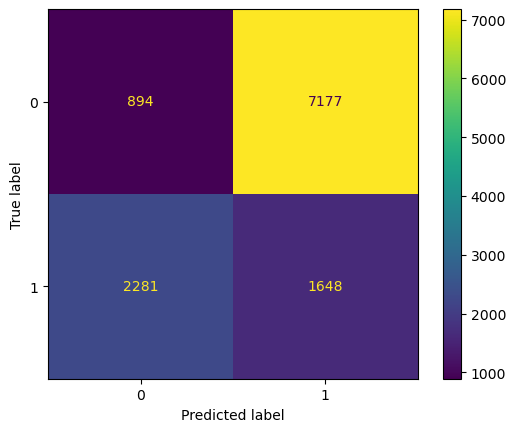

In [ ]:
#Confusion matrix for logistic regression
log_cm = confusion_matrix(y_true = y_val, y_pred = log_l2.predict(X_val_log), labels = log_l2.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=log_l2.classes_)
log_disp.plot()
plt.show() 

Text(0, 0.5, 'True Positive Rate')

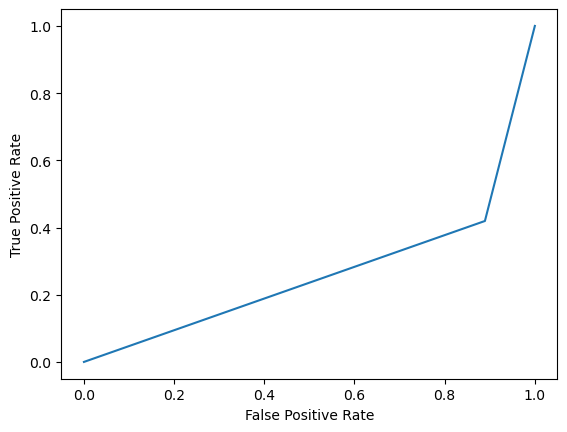

In [ ]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2.predict(X_val_log))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Sensitivity, specificity, and accuracy for log reg with unbalanced data
#Very low
log_sens = sensitivity_score(y_val, log_l2.predict(X_val_log))
log_spec = specificity_score(y_val, log_l2.predict(X_val_log))
log_acc = accuracy_score(y_val, log_l2.predict(X_val_log))
log_sens, log_spec, log_acc

(0.41944515143802497, 0.11076694337752448, 0.21183333333333335)

## Log reg with balanced data

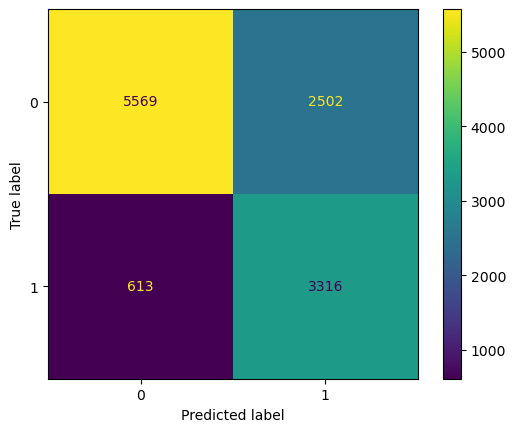

In [ ]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_val, y_pred = log_l2_bal.predict(X_val_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show() 

Text(0, 0.5, 'True Positive Rate')

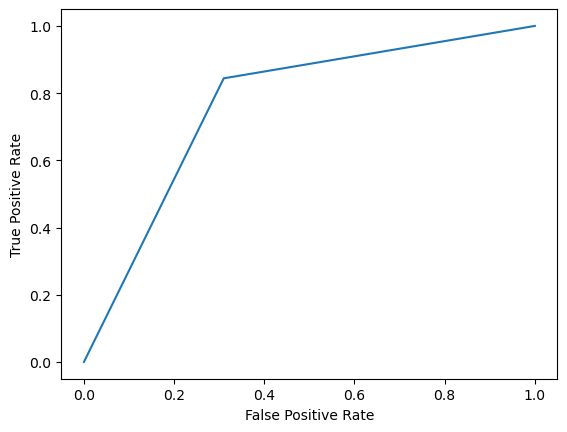

In [ ]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2_bal.predict(X_val_log))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 

In [ ]:
#Sensitivity, specificity, and accuracy for log reg with balanced data
#Much improved
log_sens_bal = sensitivity_score(y_val, log_l2_bal.predict(X_val_log))
log_spec_bal = specificity_score(y_val, log_l2_bal.predict(X_val_log))
log_acc_bal = accuracy_score(y_val, log_l2_bal.predict(X_val_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.8439806566556376, 0.6900012390038409, 0.7404166666666666)

## Decision Tree

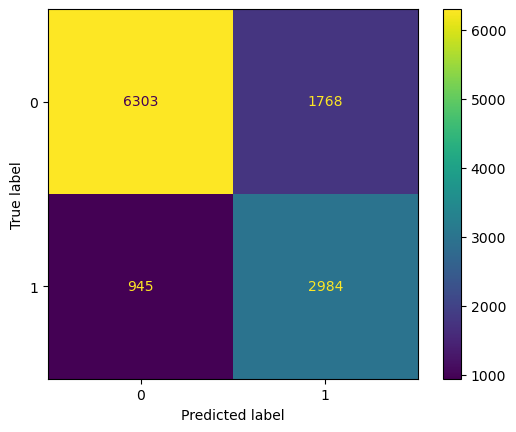

In [ ]:
#Confusion matrix for logistic regression balanced
tree_cm_bal = confusion_matrix(y_true = y_val, y_pred = tree_search.predict(X_val), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [ ]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_val, tree_search.predict(X_val))
tree_spec_bal = specificity_score(y_val, tree_search.predict(X_val))
tree_acc_bal = accuracy_score(y_val, tree_search.predict(X_val))
tree_sens_bal, tree_spec_bal, tree_acc_bal

(0.759480783914482, 0.7809441209267749, 0.7739166666666667)

## KNN

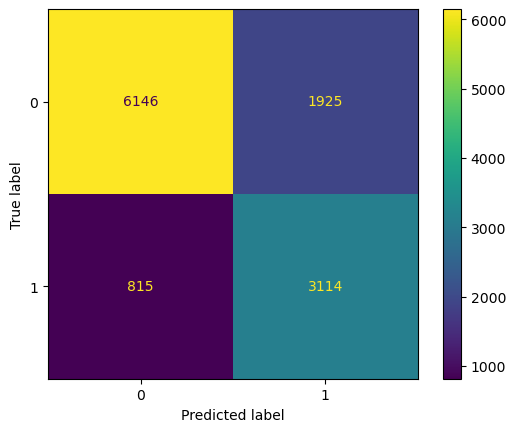

In [ ]:
knn_cm_bal = confusion_matrix(y_true = y_val, y_pred = knn.predict(X_val), labels = knn.classes_)
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()

In [ ]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
#Much improved
knn_sens_bal = sensitivity_score(y_val, knn.predict(X_val))
knn_spec_bal = specificity_score(y_val, knn.predict(X_val))
knn_acc_bal = accuracy_score(y_val, knn.predict(X_val))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal

(0.792568083481802, 0.7614917606244579, 0.7716666666666666)

## Neural network

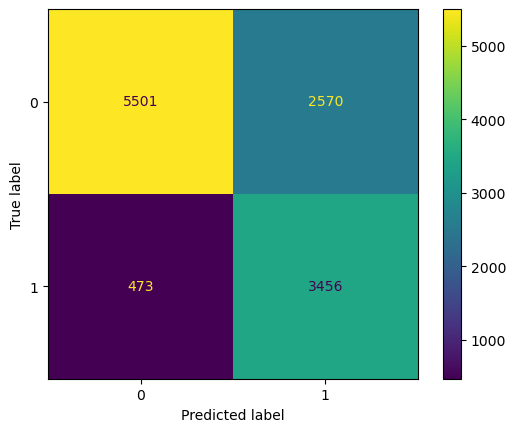

In [ ]:
nn_cm_bal = confusion_matrix(y_true = y_val, y_pred = nn.predict(X_val), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
nn_disp_bal.plot()
plt.show() 

In [ ]:
#Sensitivity, specificity, and accuracy for neural net
nn_sens = sensitivity_score(y_val, nn.predict(X_val))
nn_spec = specificity_score(y_val, nn.predict(X_val))
nn_acc = accuracy_score(y_val, nn.predict(X_val))
nn_sens, nn_spec, nn_acc

(0.8796131331127514, 0.68157601288564, 0.7464166666666666)

# Top Two Models: Logistic Regression and Neural Network. Compare performance on test set. Calculate AIC scores.

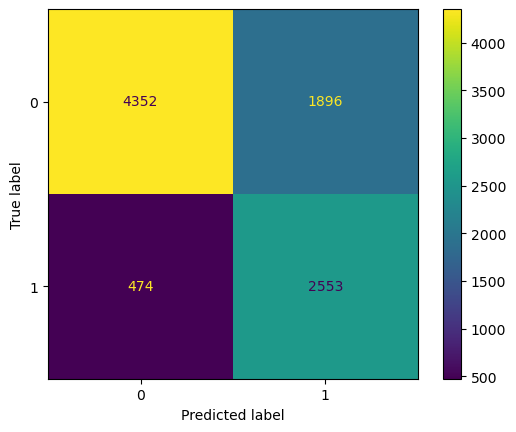

In [ ]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_test, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show() 

In [ ]:
log_sens_bal = sensitivity_score(y_test, log_l2_bal.predict(X_test_log))
log_spec_bal = specificity_score(y_test, log_l2_bal.predict(X_test_log))
log_acc_bal = accuracy_score(y_test, log_l2_bal.predict(X_test_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.8434093161546086, 0.6965428937259923, 0.7444743935309973)

In [ ]:
#AIC score

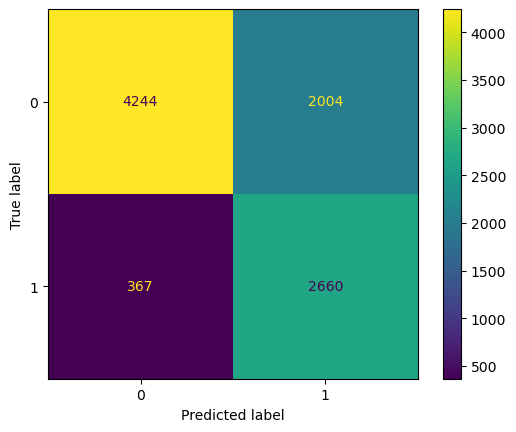

In [ ]:
nn_cm_bal = confusion_matrix(y_true = y_test, y_pred = nn.predict(X_test), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
nn_disp_bal.plot()
plt.show() 

In [ ]:
nn_sens_bal = sensitivity_score(y_test, nn.predict(X_test))
nn_spec_bal = specificity_score(y_test, nn.predict(X_test))
nn_acc_bal = accuracy_score(y_test, nn.predict(X_test))
nn_sens_bal, nn_spec_bal, nn_acc_bal

(0.8787578460521969, 0.6792573623559539, 0.744366576819407)

In [ ]:
#AIC score

# References
 * https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/